In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


In [10]:
events = pd.read_csv('events.csv')
gender_age = pd.read_csv('gender_age.csv')
phone_device = pd.read_csv('phone_device.csv')


In [11]:
print(events.head())
print(events.shape)
print(events.info())


   event_id            device_id            timestamp  longitude  latitude
0         1    29182687948017175  2016-05-01 00:55:25     121.38     31.24
1         2 -6401643145415154744  2016-05-01 00:54:12     103.65     30.97
2         3 -4833982096941402721  2016-05-01 00:08:05     106.60     29.70
3         4 -6815121365017318426  2016-05-01 00:06:40     104.27     23.28
4         5 -5373797595892518570  2016-05-01 00:07:18     115.88     28.66
(3252950, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  int64  
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 124.1+ MB
None


In [12]:
print(gender_age.head())
print(gender_age.shape)
print(gender_age.info())


             device_id gender  age   group
0 -8076087639492063270      M   35  M32-38
1 -2897161552818060146      M   35  M32-38
2 -8260683887967679142      M   35  M32-38
3 -4938849341048082022      M   30  M29-31
4   245133531816851882      M   30  M29-31
(74645, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB
None


- Device data consist of 187244 rows and 5 columns with 187245 entries.
- There is no null value in the entire dataset.
- Since some of the values in column phone_brand and device_model are given in chinese language, they have been translated to english language for better understanding. phone_brand_en and device_model_en consists of respective translated name.
- The device_id is of float datatype and rest other details are in object type.
- In order to merge the datasets, device_id should be converted to integer type.

# Data Cleaning:
Converting the names from Chinese to English

In [13]:
names = { '三星': 'Samsung',
    '天语': 'Ktouch',
    '海信': 'hisense',
    '联想': 'lenovo',
    '爱派尔': 'ipair',
    '一加': 'oneplus',
    '诺基亚': 'nokia',
    '华硕': 'asus',
    '夏新': 'panasonic',
    '锤子': 'hammer'}

Remove the duplicates

In [14]:
events = events.drop_duplicates()
gender_age = gender_age.drop_duplicates()
phone_device = phone_device.drop_duplicates()


Merge the data

In [15]:
data = pd.merge(gender_age, phone_device, on='device_id', how='left')

Print the first few samples, shape, info of the data

In [16]:
print(data.head())
print(data.shape)
print(data.info())

             device_id gender  age   group phone_brand device_model
0 -8076087639492063270      M   35  M32-38          小米         MI 2
1 -2897161552818060146      M   35  M32-38          小米         MI 2
2 -8260683887967679142      M   35  M32-38          小米         MI 2
3 -4938849341048082022      M   30  M29-31          小米       红米note
4   245133531816851882      M   30  M29-31          小米         MI 3
(74646, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 74646 entries, 0 to 74645
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     74646 non-null  int64 
 1   gender        74646 non-null  object
 2   age           74646 non-null  int64 
 3   group         74646 non-null  object
 4   phone_brand   74646 non-null  object
 5   device_model  74646 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.0+ MB
None


Check for missing values

In [17]:
print(data.isnull().sum())
data['phone_brand'] = data['phone_brand'].fillna('unknown')

device_id       0
gender          0
age             0
group           0
phone_brand     0
device_model    0
dtype: int64


In [18]:
# data['device_id']
# data.drop(['device_id'], axis = 1)


Check the statistical summary for the numerical and categorical columns

In [19]:
print(data.describe())
print(data.describe(include='O'))


          device_id           age
count  7.464600e+04  74646.000000
mean  -6.788546e+14     31.410163
std    5.327149e+18      9.868791
min   -9.223067e+18      1.000000
25%   -4.617358e+18     25.000000
50%   -1.837725e+16     29.000000
75%    4.637026e+18     36.000000
max    9.222849e+18     96.000000
       gender   group phone_brand device_model
count   74646   74646       74646        74646
unique      2      12         120         1438
top         M  M23-26          小米       红米note
freq    47905    9605       17300         3013


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31859 (\N{CJK UNIFIED IDEOGRAPH-7C73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26143 (\N{CJK UNIFIED IDEOGRAPH-661F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21326 (\N{CJK UNIFIED IDEOGRAPH-534E}) missing from current font.
  fig.canvas.print_figure(bytes_

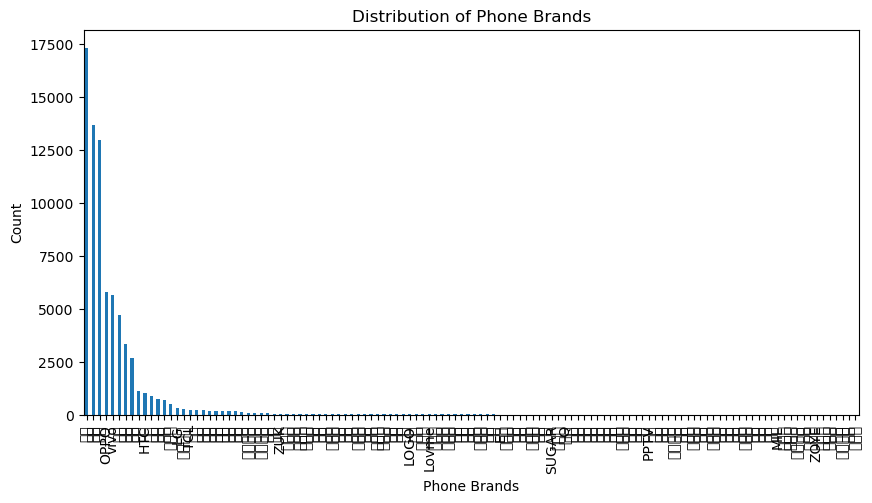

In [20]:
# Plot the distribution of phone brands
plt.figure(figsize=(10, 5))
data['phone_brand'].value_counts().plot(kind='bar')
plt.title('Distribution of Phone Brands')
plt.xlabel('Phone Brands')
plt.ylabel('Count')
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32418 (\N{CJK UNIFIED IDEOGRAPH-7EA2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31859 (\N{CJK UNIFIED IDEOGRAPH-7C73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 33635 (\N{CJK UNIFIED IDEOGRAPH-8363}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32768 (\N{CJK UNIFIED IDEOGRAPH-8000}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30021 (\N{CJK UNIFIED IDEOGRAPH-7545}) missing from current font.
  fig.canvas.print_figure(bytes_

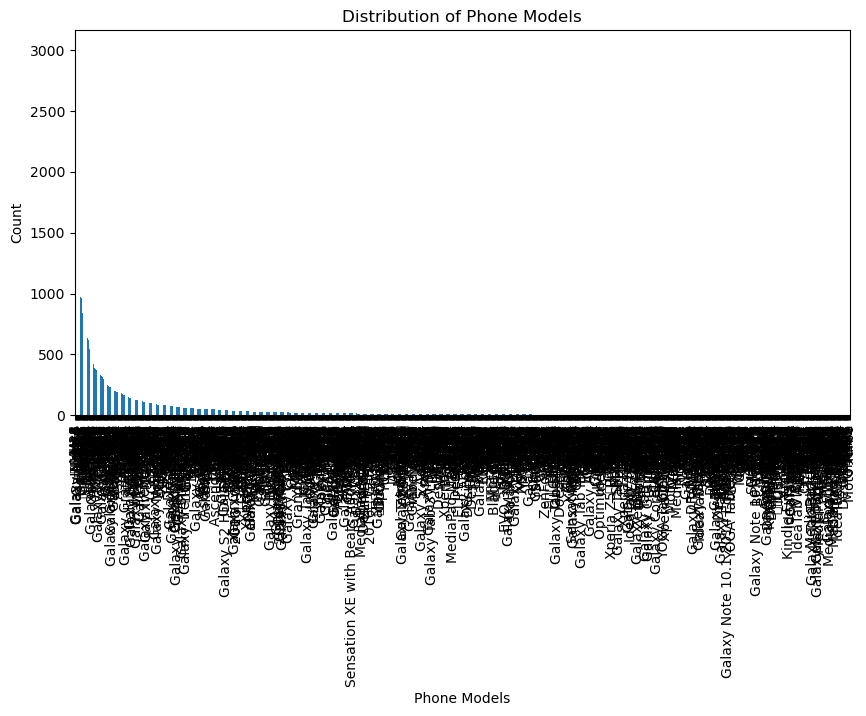

In [21]:
# Plot the distribution of models of the phones used
plt.figure(figsize=(10, 5))
data['device_model'].value_counts().plot(kind='bar')
plt.title('Distribution of Phone Models')
plt.xlabel('Phone Models')
plt.ylabel('Count')
plt.show()


Encode the categorical variables in the dataset.
Convert the categorical variables into numerical variables

In [22]:
le = LabelEncoder()

data['phone_brand']= le.fit_transform(data['phone_brand'])
data['device_model']= le.fit_transform(data['device_model'])
data['gender']= le.fit_transform(data['gender'])
data['group']= le.fit_transform(data['group'])

# Data Preparation
Standardize the numerical variables in the dataset

In [23]:
sc = StandardScaler()

data['phone_brand'] = sc.fit_transform(
    data['phone_brand'].values.reshape(-1, 1))
data['device_model'] = sc.fit_transform(
    data['device_model'].values.reshape(-1, 1))

# Principle Component Analysis and Clustering

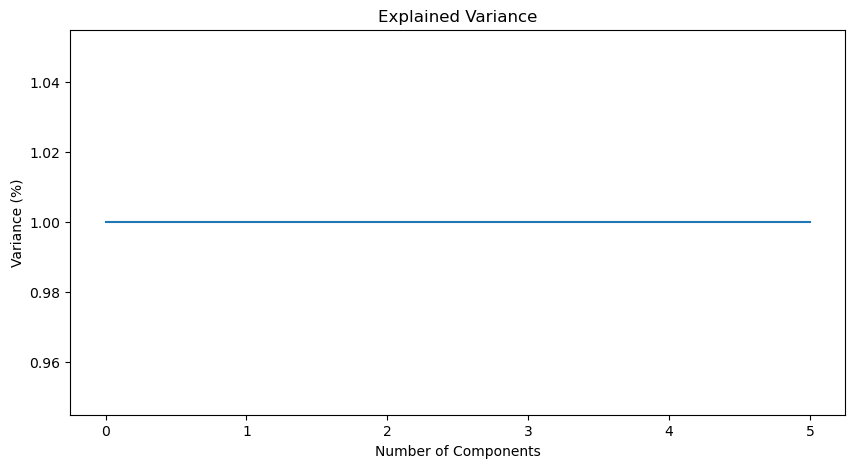

In [24]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data)
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

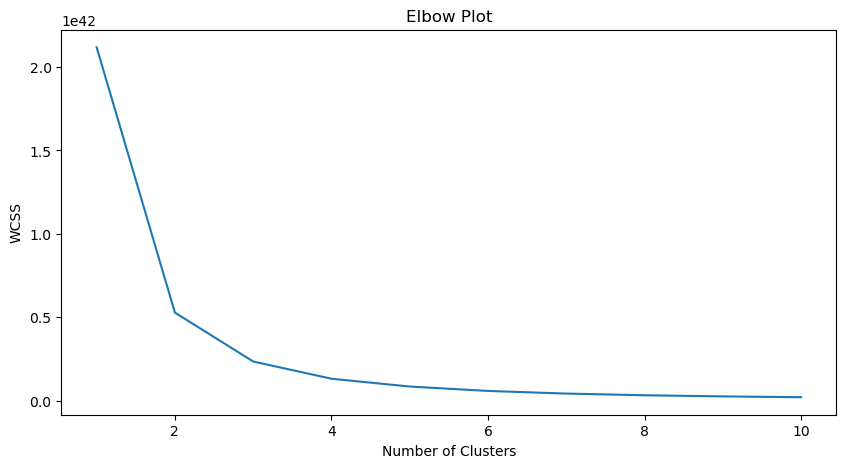

In [25]:
# Find the optimal k value using the Elbow Plot
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


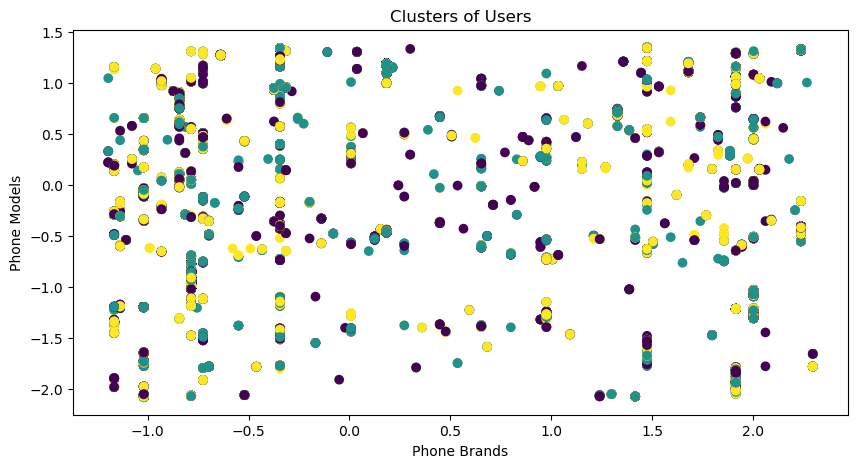

In [26]:
# Build K Means Clustering Model using the optimal k value from the Elbow Plot
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data)
labels_kmeans = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 5))
plt.scatter(data['phone_brand'], data['device_model'], c=labels_kmeans)
plt.title('Clusters of Users')
plt.xlabel('Phone Brands')
plt.ylabel('Phone Models')
plt.show()

In [27]:
# Compute the silhouette score for evaluating the quality of the clustering
silhouette_score(data, labels_kmeans)


0.5901821091045917

In [28]:
# Reduce the size of the dataset to 1000 rows for faster computation for agglomerative clustering
data = data.sample(n=1000, random_state=0)

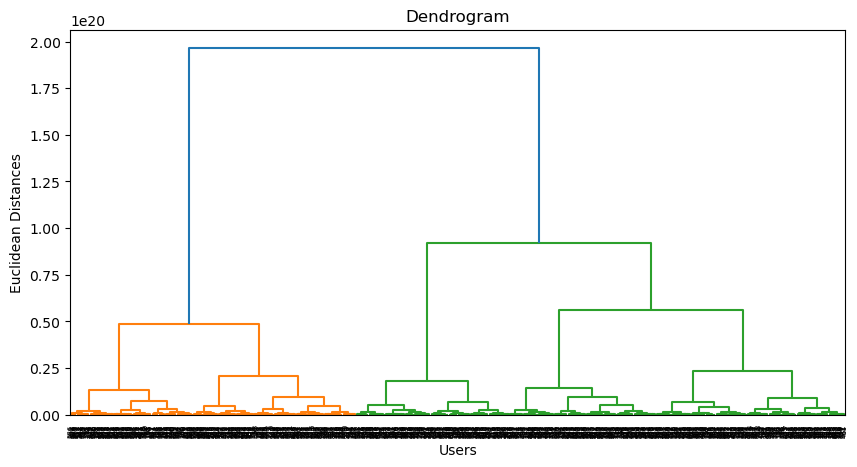

In [29]:
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Users')
plt.ylabel('Euclidean Distances')
plt.show()

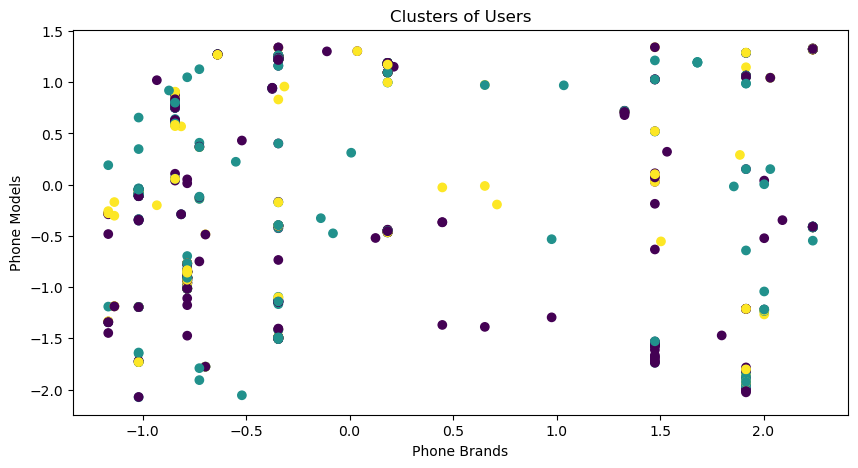

In [30]:
# Build Agglomerative Clustering Model using the optimal k value from the Dendrogram
ac = AgglomerativeClustering(
    n_clusters=3, affinity='euclidean', linkage='ward')
ac.fit(data)
labels_agglo = ac.labels_

# Plot the clusters
plt.figure(figsize=(10, 5))
plt.scatter(data['phone_brand'], data['device_model'], c=labels_agglo)
plt.title('Clusters of Users')
plt.xlabel('Phone Brands')
plt.ylabel('Phone Models')
plt.show()


In [31]:
# Compute the silhouette score for evaluating the quality of the clustering
s = silhouette_score(data, labels_agglo)
print(s)

0.542615545817756


# Conclusion:

In [ ]:
# 1. Value of k can be determined using elbow method. k =3


SyntaxError: invalid syntax (2577911103.py, line 1)